<a href="https://colab.research.google.com/github/MarcoLorenzetti/CompLabB-UNIPD-TeamDream/blob/main/2220_homework_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group 2220  
Daniel  
Theivan  
Marco  
Jake  

# Exercise 3, CNN, question 2 and 3

# Initial Set-Up

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
import pandas as pd
from scipy import stats
import seaborn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten #, Reshape
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

L=60
input_shape = (L, 1)
n_class = 3
BATCH_SIZE = 250
EPOCHS = 100
accuracy_1 =[]

def Show_data(x,L,j0,s="data"):
    plt.figure(figsize=(12,4))
    plt.plot(np.arange(L),x[0])  #np.arange(L): vai da 0 a L con step=1
    plt.plot(np.arange(L,2*L),x[1])  #vai da L a 2*L ...
    plt.plot(np.arange(2*L,3*L),x[2])
    plt.plot(np.arange(3*L,4*L),x[3])
    plt.plot(np.arange(4*L,5*L),x[4])
    plt.plot(np.arange(5*L,6*L),x[5])
    for i in range(6):
        plt.fill_between(np.arange(L*i + j0[i],L*i + j0[i] + 12), np.amin(x[0:6]), np.amax(x[0:6]), facecolor='gray', alpha=0.4)
    plt.title(s)
    plt.xlabel("time")
    plt.grid()
    plt.show()
    
def Show_weights(model,l=0,label="model"):
    c=['r','y','c','b','m'] #colori
    m=['o','s','D','<','>'] #markers
    ms=10
    
    w = model.layers[l].get_weights()[0]
    wT=w.T
    M=len(wT)
    b = model.layers[l].get_weights()[1]
    
    fig,AX=plt.subplots(1,2,figsize=(12,4.4))
    ax=AX[0]
    ax.axhline(0, c="k")
    ax.plot((0,))
    for i in range(M):
        ax.plot(wT[i][0],"-",c=c[i],marker=m[i],label=str(i),markersize=ms)
    ax.set_title(label+': filters of layer '+str(l))
    ax.set_xlabel('index')
    ax=AX[1]
    ax.axhline(0, c="k")
    for i in range(M):
        ax.plot((i),(b[i]),c=c[i],marker=m[i],label="filter "+str(i),markersize=ms)
    ax.set_title(label+': bias of layer '+str(l))
    ax.set_xlabel('filter nr')
    ax.set_xticks(np.arange(5))
    ax.legend()
    plt.show()
def Show_history(fit):
    fig,AX=plt.subplots(1,2,figsize=(12,5.))
    ax=AX[0]
    ax.plot(fit.history['accuracy'],"b",label="train")
    ax.plot(fit.history['val_accuracy'],"r--",label="valid.")
    ax.plot((0,EPOCHS),(1/3,1/3),":",c="gray",label="random choice")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Accuracy")
    ax.set_ylim([0, 1])
    ax.legend()
    ax=AX[1]
    ax.plot(fit.history['loss'],"b",label="train")
    ax.plot(fit.history['val_loss'],"r--",label="valid.")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Loss")
    ax.set_ylim([0, 1.05*np.max(fit.history['loss'])])
    ax.legend()
    plt.show()

def build_modelJ():
    reg = tf.keras.regularizers.l2(0.2) ## raised to 0.2
    #reg = regularizers.l1(0.1)
    ini = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, 
                                            seed=None)
    NF = 5
    # challenge: at most 600 tunable parameters
    model = Sequential()
    # -----2-----
    model.add(Conv1D(filters=NF, kernel_size=11, 
                     kernel_initializer=ini, 
                     kernel_regularizer=reg,
                     activation='relu', 
                     input_shape=input_shape))
    #model.add(MaxPooling1D(3))
    model.add(AveragePooling1D(5))
    model.add(Conv1D(filters=5, kernel_size=7, 
                     activation='relu'))
    model.add(Flatten())
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(n_class, activation='softmax'))
    opt = tf.keras.optimizers.Adam()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,metrics=['accuracy'])
    return model

def build_model(init='normal', reg='l2', lmb=0.2):
    #Initializers
    if init=='zeros':
        ini=tf.keras.initializers.Zeros()
    elif init=='ones':
        ini=tf.keras.initializers.Ones()
    elif init=='normal':
        ini=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
    else:
        print('Error Initializers')
    #Regularizers
    if reg=='l1':
        rer=tf.keras.regularizers.l1(lmb)
    elif reg=='l2':
        reg=tf.keras.regularizers.l2(lmb)
    elif reg=='l1_l2':
        reg=tf.keras.regularizers.l1_l2(lmb, lmb)
    else:
        print('Error Regularizers')
    # challenge: at most 600 tunable parameters
    model = Sequential()
    model.add(Conv1D(filters=5, kernel_size=11, 
                     kernel_initializer=ini, # ini - ini_0 - ini_1
                     kernel_regularizer=reg,
                     activation='relu', 
                     input_shape=input_shape))
    model.add(AveragePooling1D(5))
    model.add(Conv1D(filters=5, kernel_size=7, 
                     activation='relu'))
    model.add(Flatten())
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_class, activation='softmax')) # softmax !    --->n_class=3 : Multiclassification
    opt = tf.keras.optimizers.Adam()
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,metrics=['accuracy'])
    return model

##################################################################################################

jump = lambda drift, stdev: int(np.random.normal(drift,stdev))

def pattern(i,z,a):
    p = a*np.sin((np.pi*i)/z)
    return p.astype(int) #Use numpy convesion instead it aviods "IOPub data rate exceeded"

def gen_data(j0, A=500): #Generate datasets with varying A     
    np.random.seed(12345)
    Z=12 # Z=nr of steps
    N=10000  # number of data samples
    L=60 # size of each sample of the timeseries 
    DX = 50  # step parameters: introduce small positive bias 
    bias = 5

    y = [0] * N
    x = [[0] * L for i in range(N)] 
    for i in range(N):
        if i>0:
            x[i][0] = x[i-1][-1] + jump(bias,DX)
        for j in range(1,L):
            x[i][j] = x[i][j-1] + jump(bias,DX)  
        y[i] = i%3 
        if y[i]>0:
#             j0 = np.random.randint(0,L-1-Z)
            sign = 3-2*y[i]
            for j in range(Z):
                x[i][j0[i]+j] += sign*pattern(j,Z,A)
    return np.asarray(x), np.asarray(y)

def prep_data(x,y):
    xm = x.mean(axis=1)
    for i in range(N):
        x[i] = x[i]-xm[i]

    x = x/400
    
    #spliting of training and validation 
    perc_train=0.8 
    N_train = int(perc_train*N)
    x_train = x[:N_train]
    y_train = y[:N_train]
    x_val = x[N_train:]
    y_val = y[N_train:]

    # Keras wants an additional dimension with a 1 at the end
    x_train = x_train.reshape(x_train.shape[0], L, 1)
    x_val =  x_val.reshape(x_val.shape[0], L, 1)
    input_shape = (L, 1)
    return x_train, y_train, x_val, y_val, input_shape

def show_confusion_matrix(validations, predictions, label="Model"):
    LABELS = ["absent","positive","negative"]
    cmap="GnBu"
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 5))
    seaborn.heatmap(matrix,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d',
                linecolor='white',
                linewidths=1,
                cmap=cmap)
    plt.title(label+': Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def Show_history(fit, label =''):
    fig,AX=plt.subplots(1,2,figsize=(12,5.))
    ax=AX[0]
    ax.set_title(label+'')
    ax.plot(fit.history['accuracy'],"b",label="train")
    ax.plot(fit.history['val_accuracy'],"r--",label="valid.")
    ax.plot((0,EPOCHS),(1/3,1/3),":",c="gray",label="random choice")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Accuracy")
    ax.set_ylim([0, 1])
    ax.legend()
    ax=AX[1]
    ax.set_title(label+' Loss ')
    ax.plot(fit.history['loss'],"b",label="train")
    ax.plot(fit.history['val_loss'],"r--",label="valid.")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Loss")
    ax.set_ylim([0, 1.05*np.max(fit.history['loss'])])
    ax.legend()
    plt.show()

# 2 Signal Amplitude

With a greater amplitude for the sine pattern that is injected into the samples we are increasing the signal to noise ratio. This should make it easier for the CNN to detect the pattern. Here the intention is to quantify the effect.

A =  0  accuracy: 0.3370000123977661


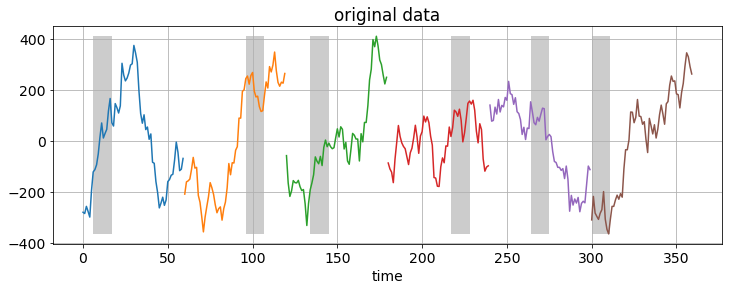

A =  50  accuracy: 0.33799999952316284


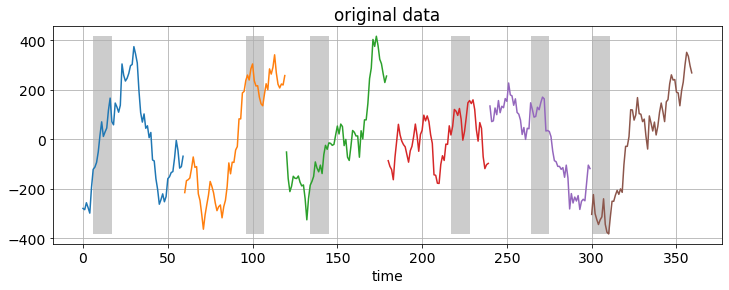

A =  100  accuracy: 0.3544999957084656


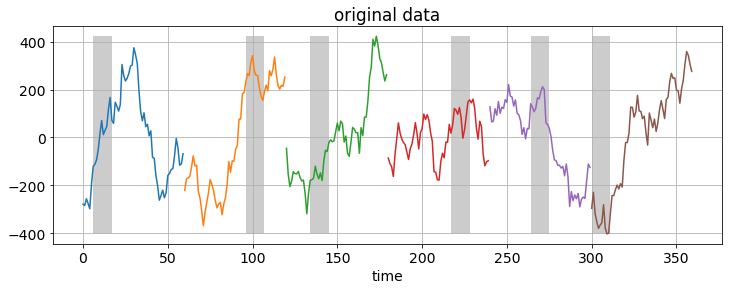

A =  150  accuracy: 0.39100000262260437


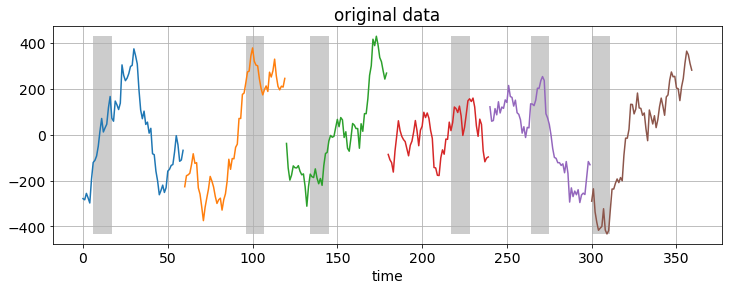

A =  200  accuracy: 0.4909999966621399


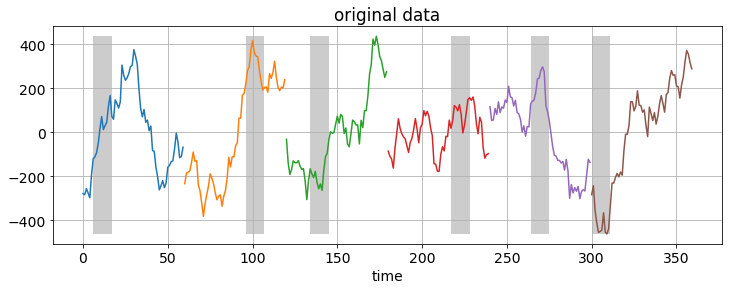

A =  250  accuracy: 0.5814999938011169


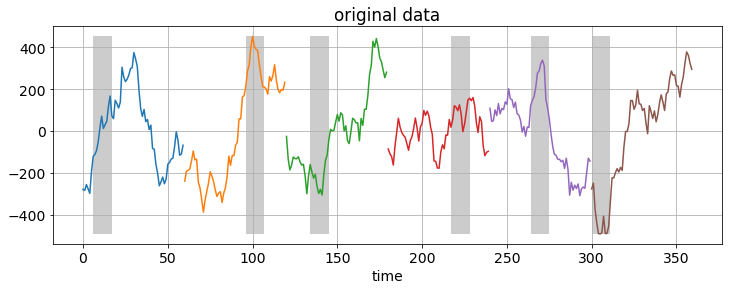

A =  300  accuracy: 0.7200000286102295


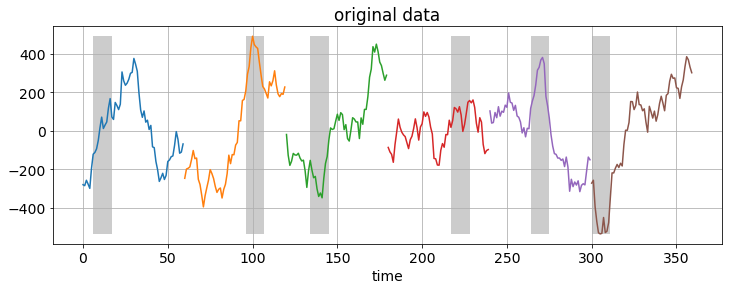

A =  350  accuracy: 0.8090000152587891


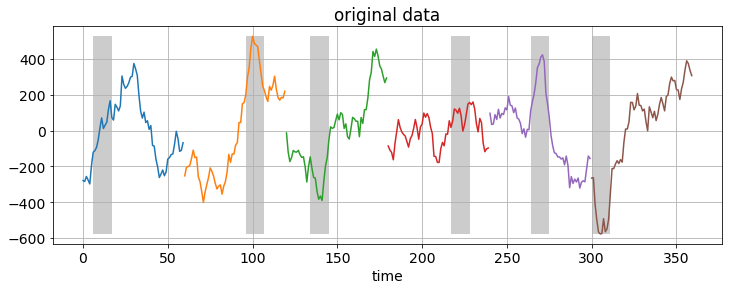

A =  400  accuracy: 0.8690000176429749


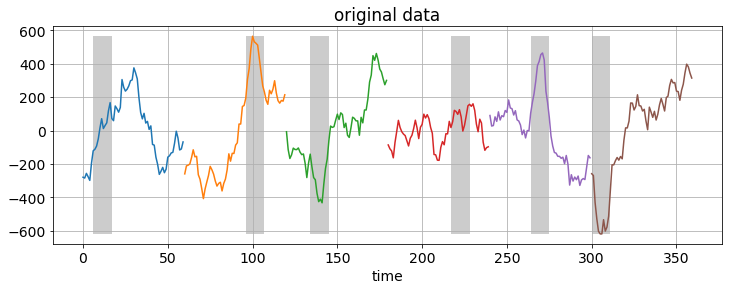

A =  450  accuracy: 0.9160000085830688


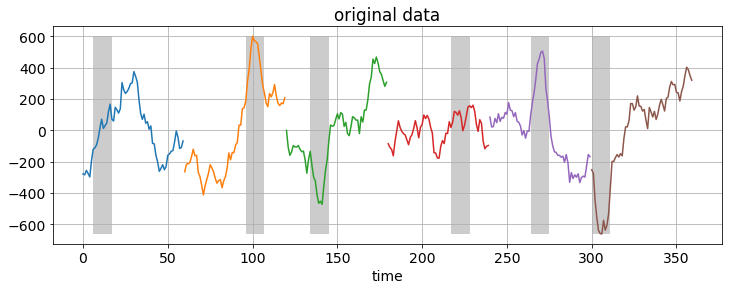

A =  500  accuracy: 0.9495000243186951


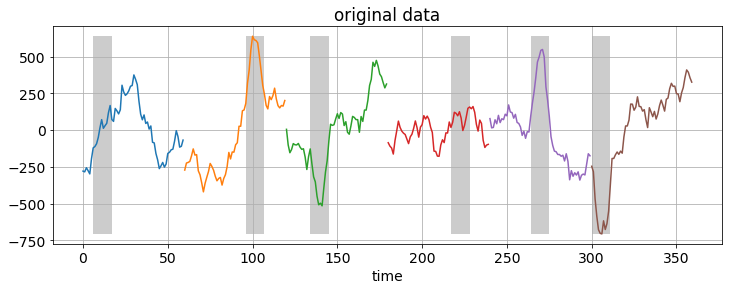

A =  550  accuracy: 0.9704999923706055


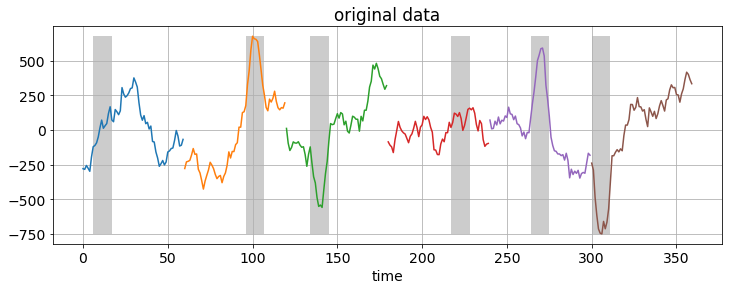

A =  600  accuracy: 0.9850000143051147


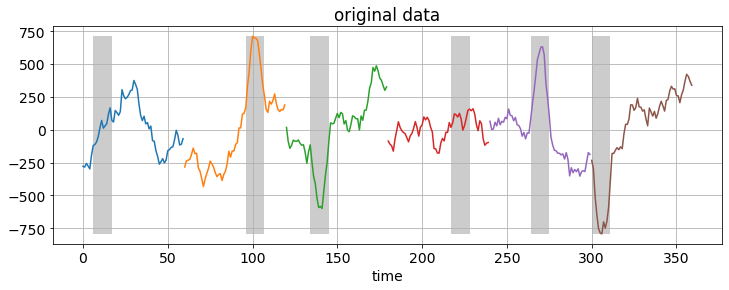

A =  650  accuracy: 0.9929999709129333


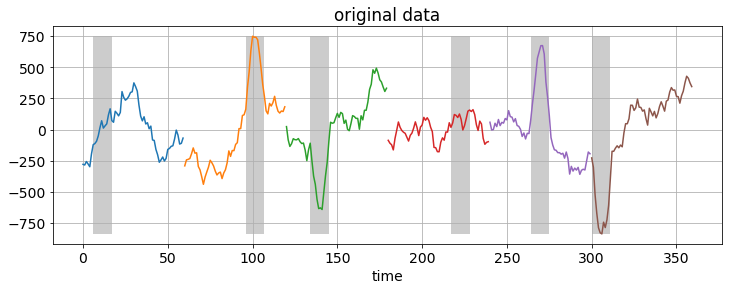

A =  700  accuracy: 0.9950000047683716


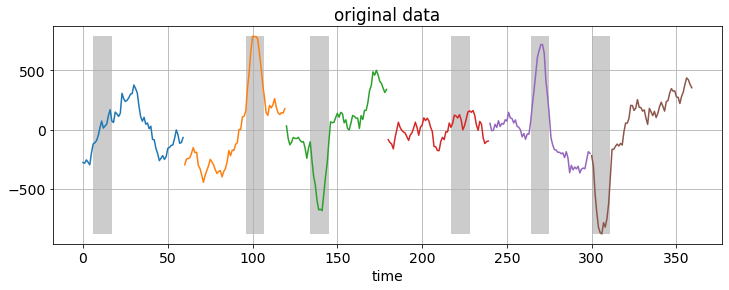

A =  800  accuracy: 0.9994999766349792


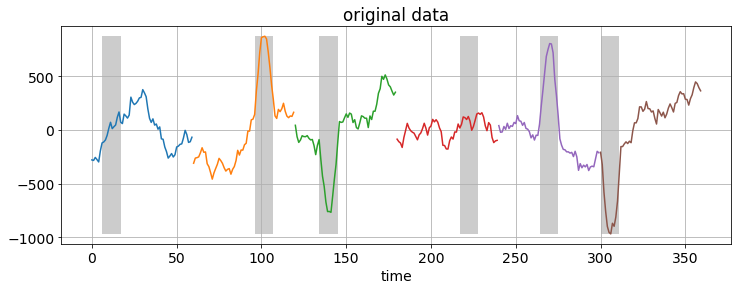

[0.3370000123977661, 0.33799999952316284, 0.3544999957084656, 0.39100000262260437, 0.4909999966621399, 0.5814999938011169, 0.7200000286102295, 0.8090000152587891, 0.8690000176429749, 0.9160000085830688, 0.9495000243186951, 0.9704999923706055, 0.9850000143051147, 0.9929999709129333, 0.9950000047683716, 0.9994999766349792]


In [2]:
Amplitudes  =[0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,800]
model = build_modelJ()
N, L, Z = 10000, 60, 12
j0 = [np.random.randint(0,L-1-Z) for i in range(N)]

for A in Amplitudes:
    x, categ = gen_data(j0, A)
    n_class = 3
    N,L = len(x), len(x[0])
    y = np.zeros((N,n_class))
    for i in range(N):
        y[i][categ[i]] = 1. #prof does it here but might add to gen_data 
    x_train, y_train, x_val, y_val, input_shape = prep_data(x,y)
    fit = model.fit(x_train,y_train,batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                validation_data=(x_val, y_val),
                verbose=0, shuffle=True)  
    
    loss1, acc1 = model.evaluate(x=x_val, y=y_val, verbose = 0)
    accuracy_1.append(acc1)
    print('A = ', A, " accuracy:", str(acc1))
    Show_data(x,L,j0,"original data")
    y_pred_val = model.predict(x_val)
    # Take the class with the highest probability from the val predictions
    max_y_pred_val = np.argmax(y_pred_val, axis=1)
    max_y_val = np.argmax(y_val, axis=1)

    #show_confusion_matrix(max_y_val, max_y_pred_val, label="Model 1, A = "+str(A))
    
print(accuracy_1)

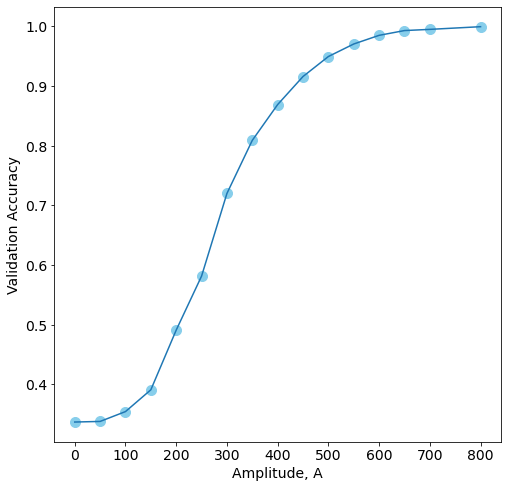

In [3]:
fig, ax =plt.subplots(1,1,figsize=(8,8))

ax.plot(Amplitudes, accuracy_1, label ="Model 1")
ax.scatter(Amplitudes, accuracy_1, marker='.', s=400, color='skyblue')
#ins = ax.inset_axes([0.57,0.18,0.4,0.4])
ax.set_xlabel("Amplitude, A")
ax.set_ylabel("Validation Accuracy")
plt.show()

### Results

This plot show that signal amplitude has a significant effect on the accuracy. With too low an amplitude the model is reduced to a random guess. With a high amplitude the model can get near perfect performance.

# Regularisation Tuning

Regularisation restricts the size of the weights, thus the weights are less flexible and cannot fit the training data as well. This however means the model is more likley to follow the trend of the entire population. Thus regularisation can help validation accuracy improve. With too much regularisation the weights are too restriced and they can't fit the training data very well at all and thus don't follow the trend of the population either. Too much regularisation can make the validation accuracy worse.

To achieve regularisation the function that guides the gradient descent is a compination of the cost function and a regularisation function. The parameter D tunes the amount of regularisation. With smaller D there is more regularisation. 

argmin($D$ Cost + Regularisation)

There are multiple possible choices for the regularisation function. The three ones provided by keras are tested l1,l2 and l1_l2.

How to find the best combination of parameters? Well with a grid search of course...

### Read the data

In [5]:
str0 = 'ts_L60_Z12_A500_DX50_bias5_N10000.dat'
fnamex='DATA/x_'+str0
fnamey='DATA/y_'+str0
x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
N,L = len(x), len(x[0]) #10000 60
# Show_data(x,L,"original data")
categ = np.loadtxt(fnamey, dtype=int)
n_class = 3    # y.argmax() - y.argmin() +1
print('data: ',N)
y = np.zeros((N,n_class))
for i in range(N):
    y[i][categ[i]] = 1.

data:  10000


### Split and Rescale the data

In [6]:
#OPTIOIN 1----- 
xm = x.mean(axis=1)
for i in range(N):
    x[i] = x[i]-xm[i]
x_scaled = x/400
# Show_data(x_scaled,L,"rescaled data") 

perc_train=0.8
N_train = int(perc_train*N)
x_train = x_scaled[:N_train]
y_train = y[:N_train]
x_val = x_scaled[N_train:]
y_val = y[N_train:]
N_val = len(x_val)
print('N_train=',N_train,'  N_val=',N_val,'  L=',L,'  n_class=',n_class)
# Keras wants an additional dimension with a 1 at the end
x_train = x_train.reshape(x_train.shape[0], L, 1) #shape: (8000,60,1 aggiuntiva)
x_val =  x_val.reshape(x_val.shape[0], L, 1) #shape: (2000,60,1 aggiuntiva)
input_shape = (L, 1)

N_train= 8000   N_val= 2000   L= 60   n_class= 3


### Perform the GridSearch 

In [7]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
BATCH_SIZE = 250
EPOCHS = 50
parameters = {
                'reg':['l1', 'l2', 'l1_l2'],
                'lmb':[0, 1e-1, 1e-3, 1e-5]
             }

model_gridsearch = KerasClassifier(build_fn = build_model, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
grid = GridSearchCV(estimator=model_gridsearch, param_grid=parameters, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

Epoch 1/50


C:\Users\Marco\AppData\Local\Temp/ipykernel_23216/974317067.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn = build_model, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)


24/24 [==============================] - 1s 6ms/step - loss: 1.1135 - accuracy: 0.3657
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0984 - accuracy: 0.4552
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0803 - accuracy: 0.5140
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0518 - accuracy: 0.5298
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0027 - accuracy: 0.5650
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.9406 - accuracy: 0.6353
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.8757 - accuracy: 0.6830
Epoch 8/50
24/24 [==============================] - 0s 4ms/step - loss: 0.8139 - accuracy: 0.7208
Epoch 9/50
24/24 [==============================] - 0s 4ms/step - loss: 0.7499 - accuracy: 0.7547
Epoch 10/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.7933
Epoch 11/50
24/24 [===========

24/24 [==============================] - 0s 4ms/step - loss: 0.2445 - accuracy: 0.9365
Epoch 34/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2414 - accuracy: 0.9377
Epoch 35/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2352 - accuracy: 0.9440
Epoch 36/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2348 - accuracy: 0.9395
Epoch 37/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2327 - accuracy: 0.9468
Epoch 38/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2223 - accuracy: 0.9450
Epoch 39/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2160 - accuracy: 0.9488
Epoch 40/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2192 - accuracy: 0.9467
Epoch 41/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2098 - accuracy: 0.9478
Epoch 42/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2155 - accuracy: 0.9482
Epoch 43/50
24/24 [===

24/24 [==============================] - 0s 4ms/step - loss: 0.5916 - accuracy: 0.7948
Epoch 15/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5541 - accuracy: 0.8217
Epoch 16/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5207 - accuracy: 0.8270
Epoch 17/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4915 - accuracy: 0.8468
Epoch 18/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.8547
Epoch 19/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4398 - accuracy: 0.8692
Epoch 20/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4215 - accuracy: 0.8730
Epoch 21/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4010 - accuracy: 0.8848
Epoch 22/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3821 - accuracy: 0.8938
Epoch 23/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3725 - accuracy: 0.8917
Epoch 24/50
24/24 [===

24/24 [==============================] - 0s 4ms/step - loss: 0.1407 - accuracy: 0.9565
Epoch 47/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1343 - accuracy: 0.9580
Epoch 48/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1350 - accuracy: 0.9575
Epoch 49/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1306 - accuracy: 0.9582
Epoch 50/50
8/8 [==============================] - 0s 3ms/step - loss: 0.0935 - accuracy: 0.9695
Epoch 1/50
24/24 [==============================] - 1s 7ms/step - loss: 1.0955 - accuracy: 0.3810
Epoch 2/50
24/24 [==============================] - 0s 7ms/step - loss: 1.0841 - accuracy: 0.3668
Epoch 3/50
24/24 [==============================] - 0s 7ms/step - loss: 1.0638 - accuracy: 0.3885
Epoch 4/50
24/24 [==============================] - 0s 7ms/step - loss: 1.0316 - accuracy: 0.4687
Epoch 5/50
24/24 [==============================] - 0s 7ms/step - loss: 0.9814 - accuracy: 0.5432
Epoch 6/50
24/24 [===========

24/24 [==============================] - 0s 4ms/step - loss: 0.2293 - accuracy: 0.9233
Epoch 28/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2230 - accuracy: 0.9293
Epoch 29/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2220 - accuracy: 0.9273
Epoch 30/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2146 - accuracy: 0.9298
Epoch 31/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2132 - accuracy: 0.9300
Epoch 32/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2039 - accuracy: 0.9347
Epoch 33/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2003 - accuracy: 0.9348
Epoch 34/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1985 - accuracy: 0.9332
Epoch 35/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1984 - accuracy: 0.9365
Epoch 36/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1908 - accuracy: 0.9407
Epoch 37/50
24/24 [===

24/24 [==============================] - 0s 4ms/step - loss: 0.7800 - accuracy: 0.6777
Epoch 9/50
24/24 [==============================] - 0s 4ms/step - loss: 0.7161 - accuracy: 0.7138
Epoch 10/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.7408
Epoch 11/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6069 - accuracy: 0.7773
Epoch 12/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5491 - accuracy: 0.7965
Epoch 13/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4982 - accuracy: 0.8202
Epoch 14/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4765 - accuracy: 0.8222
Epoch 15/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4378 - accuracy: 0.8368
Epoch 16/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4163 - accuracy: 0.8453
Epoch 17/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3889 - accuracy: 0.8608
Epoch 18/50
24/24 [====

24/24 [==============================] - 0s 4ms/step - loss: 0.1751 - accuracy: 0.9420
Epoch 41/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1671 - accuracy: 0.9468
Epoch 42/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1623 - accuracy: 0.9465
Epoch 43/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1631 - accuracy: 0.9470
Epoch 44/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1610 - accuracy: 0.9472
Epoch 45/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1585 - accuracy: 0.9482
Epoch 46/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1590 - accuracy: 0.9498
Epoch 47/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1488 - accuracy: 0.9545
Epoch 48/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1458 - accuracy: 0.9548
Epoch 49/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1493 - accuracy: 0.9527
Epoch 50/50
8/8 [=====

24/24 [==============================] - 0s 4ms/step - loss: 0.3146 - accuracy: 0.8955
Epoch 22/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2984 - accuracy: 0.9002
Epoch 23/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2830 - accuracy: 0.9070
Epoch 24/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2737 - accuracy: 0.9085
Epoch 25/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2572 - accuracy: 0.9170
Epoch 26/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2514 - accuracy: 0.9170
Epoch 27/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2484 - accuracy: 0.9148
Epoch 28/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2392 - accuracy: 0.9208
Epoch 29/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2341 - accuracy: 0.9222
Epoch 30/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2258 - accuracy: 0.9268
Epoch 31/50
24/24 [===

24/24 [==============================] - 0s 4ms/step - loss: 1.1031 - accuracy: 0.4463
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0871 - accuracy: 0.5282
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0594 - accuracy: 0.5475
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.9985 - accuracy: 0.5808
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.9038 - accuracy: 0.6160
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.8086 - accuracy: 0.6720
Epoch 8/50
24/24 [==============================] - 0s 5ms/step - loss: 0.7403 - accuracy: 0.7155
Epoch 9/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6823 - accuracy: 0.7473
Epoch 10/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6385 - accuracy: 0.7678
Epoch 11/50
24/24 [==============================] - 0s 5ms/step - loss: 0.5923 - accuracy: 0.7960
Epoch 12/50
24/24 [==========

24/24 [==============================] - 0s 4ms/step - loss: 0.2285 - accuracy: 0.9443
Epoch 35/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2302 - accuracy: 0.9427
Epoch 36/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2232 - accuracy: 0.9447
Epoch 37/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2187 - accuracy: 0.9428
Epoch 38/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2113 - accuracy: 0.9478
Epoch 39/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2163 - accuracy: 0.9448
Epoch 40/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2032 - accuracy: 0.9515
Epoch 41/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2078 - accuracy: 0.9498
Epoch 42/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1991 - accuracy: 0.9517
Epoch 43/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1921 - accuracy: 0.9572
Epoch 44/50
24/24 [===

24/24 [==============================] - 0s 5ms/step - loss: 0.6045 - accuracy: 0.7882
Epoch 16/50
24/24 [==============================] - 0s 5ms/step - loss: 0.5788 - accuracy: 0.7862
Epoch 17/50
24/24 [==============================] - 0s 5ms/step - loss: 0.5404 - accuracy: 0.8072
Epoch 18/50
24/24 [==============================] - 0s 5ms/step - loss: 0.5173 - accuracy: 0.8142
Epoch 19/50
24/24 [==============================] - 0s 5ms/step - loss: 0.5015 - accuracy: 0.8218
Epoch 20/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4820 - accuracy: 0.8382
Epoch 21/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4635 - accuracy: 0.8522
Epoch 22/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4441 - accuracy: 0.8565
Epoch 23/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4350 - accuracy: 0.8597
Epoch 24/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4239 - accuracy: 0.8673
Epoch 25/50
24/24 [===

24/24 [==============================] - 0s 4ms/step - loss: 0.2534 - accuracy: 0.9285
Epoch 48/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2466 - accuracy: 0.9337
Epoch 49/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2452 - accuracy: 0.9337
Epoch 50/50
8/8 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.9460
Epoch 1/50
24/24 [==============================] - 1s 5ms/step - loss: 1.1077 - accuracy: 0.3557
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0936 - accuracy: 0.4057
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0709 - accuracy: 0.4818
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0267 - accuracy: 0.5737
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.9642 - accuracy: 0.6408
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.8915 - accuracy: 0.7178
Epoch 7/50
24/24 [============

24/24 [==============================] - 0s 4ms/step - loss: 0.3003 - accuracy: 0.9193
Epoch 29/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2894 - accuracy: 0.9235
Epoch 30/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2833 - accuracy: 0.9220
Epoch 31/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.9210
Epoch 32/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.9280
Epoch 33/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2617 - accuracy: 0.9297
Epoch 34/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2558 - accuracy: 0.9342
Epoch 35/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2512 - accuracy: 0.9365
Epoch 36/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2475 - accuracy: 0.9378
Epoch 37/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2380 - accuracy: 0.9355
Epoch 38/50
24/24 [===

24/24 [==============================] - 0s 4ms/step - loss: 1.0995 - accuracy: 0.3387
Epoch 10/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0995 - accuracy: 0.3360
Epoch 11/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0995 - accuracy: 0.3337
Epoch 12/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0993 - accuracy: 0.3333
Epoch 13/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0994 - accuracy: 0.3310
Epoch 14/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0993 - accuracy: 0.3413
Epoch 15/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0994 - accuracy: 0.3315
Epoch 16/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0993 - accuracy: 0.3283
Epoch 17/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0993 - accuracy: 0.3315
Epoch 18/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0993 - accuracy: 0.3320
Epoch 19/50
24/24 [===

24/24 [==============================] - 0s 4ms/step - loss: 0.4967 - accuracy: 0.8402
Epoch 42/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4925 - accuracy: 0.8407
Epoch 43/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4821 - accuracy: 0.8473
Epoch 44/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4768 - accuracy: 0.8530
Epoch 45/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4685 - accuracy: 0.8522
Epoch 46/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4721 - accuracy: 0.8478
Epoch 47/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4679 - accuracy: 0.8530
Epoch 48/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4656 - accuracy: 0.8545
Epoch 49/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4629 - accuracy: 0.8523
Epoch 50/50
8/8 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.8755
Epoch 1/50
24/24 [======

24/24 [==============================] - 0s 5ms/step - loss: 0.3028 - accuracy: 0.9303
Epoch 23/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2906 - accuracy: 0.9353
Epoch 24/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2783 - accuracy: 0.9373
Epoch 25/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2664 - accuracy: 0.9433
Epoch 26/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2571 - accuracy: 0.9438
Epoch 27/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2523 - accuracy: 0.9470
Epoch 28/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2450 - accuracy: 0.9513
Epoch 29/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2379 - accuracy: 0.9485
Epoch 30/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2318 - accuracy: 0.9507
Epoch 31/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2285 - accuracy: 0.9540
Epoch 32/50
24/24 [===

24/24 [==============================] - 0s 5ms/step - loss: 1.0917 - accuracy: 0.4852
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0739 - accuracy: 0.5007
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0389 - accuracy: 0.5390
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.9782 - accuracy: 0.6125
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.8929 - accuracy: 0.6885
Epoch 8/50
24/24 [==============================] - 0s 6ms/step - loss: 0.7965 - accuracy: 0.7413
Epoch 9/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6962 - accuracy: 0.7915
Epoch 10/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6069 - accuracy: 0.8190
Epoch 11/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5383 - accuracy: 0.8395
Epoch 12/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4834 - accuracy: 0.8542
Epoch 13/50
24/24 [=========

24/24 [==============================] - 0s 4ms/step - loss: 0.2402 - accuracy: 0.9442
Epoch 36/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2340 - accuracy: 0.9493
Epoch 37/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2332 - accuracy: 0.9468
Epoch 38/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2319 - accuracy: 0.9472
Epoch 39/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2221 - accuracy: 0.9503
Epoch 40/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2165 - accuracy: 0.9535
Epoch 41/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2170 - accuracy: 0.9510
Epoch 42/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2205 - accuracy: 0.9517
Epoch 43/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2136 - accuracy: 0.9533
Epoch 44/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2068 - accuracy: 0.9547
Epoch 45/50
24/24 [===

24/24 [==============================] - 0s 4ms/step - loss: 0.2960 - accuracy: 0.9038
Epoch 17/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2782 - accuracy: 0.9122
Epoch 18/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2683 - accuracy: 0.9143
Epoch 19/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2555 - accuracy: 0.9183
Epoch 20/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2439 - accuracy: 0.9220
Epoch 21/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2397 - accuracy: 0.9232
Epoch 22/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2289 - accuracy: 0.9245
Epoch 23/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2151 - accuracy: 0.9320
Epoch 24/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2185 - accuracy: 0.9278
Epoch 25/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2091 - accuracy: 0.9347
Epoch 26/50
24/24 [===

24/24 [==============================] - 0s 5ms/step - loss: 0.1334 - accuracy: 0.9678
Epoch 49/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1286 - accuracy: 0.9682
Epoch 50/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1025 - accuracy: 0.9750
Epoch 1/50
24/24 [==============================] - 1s 5ms/step - loss: 1.0921 - accuracy: 0.3593
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0784 - accuracy: 0.3983
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0539 - accuracy: 0.4425
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0123 - accuracy: 0.5320
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.9559 - accuracy: 0.5980
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.8808 - accuracy: 0.6395
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.8129 - accuracy: 0.6560
Epoch 8/50
24/24 [=============

24/24 [==============================] - 0s 5ms/step - loss: 0.2299 - accuracy: 0.9278
Epoch 30/50
24/24 [==============================] - 0s 6ms/step - loss: 0.2217 - accuracy: 0.9342
Epoch 31/50
24/24 [==============================] - 0s 6ms/step - loss: 0.2167 - accuracy: 0.9347
Epoch 32/50
24/24 [==============================] - 0s 6ms/step - loss: 0.2152 - accuracy: 0.9322
Epoch 33/50
24/24 [==============================] - 0s 6ms/step - loss: 0.2140 - accuracy: 0.9305
Epoch 34/50
24/24 [==============================] - 0s 6ms/step - loss: 0.2070 - accuracy: 0.9385
Epoch 35/50
24/24 [==============================] - 0s 6ms/step - loss: 0.2050 - accuracy: 0.9398
Epoch 36/50
24/24 [==============================] - 0s 6ms/step - loss: 0.1987 - accuracy: 0.9398
Epoch 37/50
24/24 [==============================] - 0s 6ms/step - loss: 0.1961 - accuracy: 0.9452
Epoch 38/50
24/24 [==============================] - 0s 6ms/step - loss: 0.1873 - accuracy: 0.9447
Epoch 39/50
24/24 [===

24/24 [==============================] - 0s 4ms/step - loss: 0.6318 - accuracy: 0.7630
Epoch 11/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5945 - accuracy: 0.7672
Epoch 12/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5547 - accuracy: 0.7907
Epoch 13/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5255 - accuracy: 0.8062
Epoch 14/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5022 - accuracy: 0.8075
Epoch 15/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4695 - accuracy: 0.8273
Epoch 16/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4502 - accuracy: 0.8358
Epoch 17/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4282 - accuracy: 0.8387
Epoch 18/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4138 - accuracy: 0.8522
Epoch 19/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3934 - accuracy: 0.8627
Epoch 20/50
24/24 [===

24/24 [==============================] - 0s 5ms/step - loss: 0.1386 - accuracy: 0.9622
Epoch 43/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1349 - accuracy: 0.9657
Epoch 44/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1355 - accuracy: 0.9652
Epoch 45/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1302 - accuracy: 0.9637
Epoch 46/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1267 - accuracy: 0.9660
Epoch 47/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1251 - accuracy: 0.9683
Epoch 48/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1191 - accuracy: 0.9700
Epoch 49/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1227 - accuracy: 0.9668
Epoch 50/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1031 - accuracy: 0.9730
Epoch 1/50
24/24 [==============================] - 1s 5ms/step - loss: 1.1164 - accuracy: 0.3540
Epoch 2/50
24/24 [=======

24/24 [==============================] - 0s 4ms/step - loss: 0.3899 - accuracy: 0.8777
Epoch 24/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3843 - accuracy: 0.8797
Epoch 25/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3718 - accuracy: 0.8888
Epoch 26/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3643 - accuracy: 0.8915
Epoch 27/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.8940
Epoch 28/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3433 - accuracy: 0.8967
Epoch 29/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3300 - accuracy: 0.9048
Epoch 30/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3205 - accuracy: 0.9117
Epoch 31/50
24/24 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.9067
Epoch 32/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3071 - accuracy: 0.9108
Epoch 33/50
24/24 [===

24/24 [==============================] - 0s 4ms/step - loss: 1.0472 - accuracy: 0.5130
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.9929 - accuracy: 0.5848
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.9270 - accuracy: 0.6672
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.8622 - accuracy: 0.7280
Epoch 8/50
24/24 [==============================] - 0s 4ms/step - loss: 0.8046 - accuracy: 0.7637
Epoch 9/50
24/24 [==============================] - 0s 5ms/step - loss: 0.7426 - accuracy: 0.7982
Epoch 10/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.8142
Epoch 11/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6495 - accuracy: 0.8435
Epoch 12/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6072 - accuracy: 0.8538
Epoch 13/50
24/24 [==============================] - 0s 5ms/step - loss: 0.5736 - accuracy: 0.8650
Epoch 14/50
24/24 [========

24/24 [==============================] - 0s 5ms/step - loss: 0.1752 - accuracy: 0.9458
Epoch 37/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1722 - accuracy: 0.9442
Epoch 38/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1734 - accuracy: 0.9440
Epoch 39/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1719 - accuracy: 0.9432
Epoch 40/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1656 - accuracy: 0.9478
Epoch 41/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1659 - accuracy: 0.9462
Epoch 42/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1654 - accuracy: 0.9470
Epoch 43/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1549 - accuracy: 0.9532
Epoch 44/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1584 - accuracy: 0.9518
Epoch 45/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1615 - accuracy: 0.9470
Epoch 46/50
24/24 [===

24/24 [==============================] - 0s 5ms/step - loss: 0.5461 - accuracy: 0.7767
Epoch 18/50
24/24 [==============================] - 0s 5ms/step - loss: 0.5299 - accuracy: 0.7880
Epoch 19/50
24/24 [==============================] - 0s 5ms/step - loss: 0.5069 - accuracy: 0.7967
Epoch 20/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4813 - accuracy: 0.8130
Epoch 21/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4694 - accuracy: 0.8220
Epoch 22/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4459 - accuracy: 0.8325
Epoch 23/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4282 - accuracy: 0.8370
Epoch 24/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4093 - accuracy: 0.8480
Epoch 25/50
24/24 [==============================] - 0s 5ms/step - loss: 0.3844 - accuracy: 0.8643
Epoch 26/50
24/24 [==============================] - 0s 5ms/step - loss: 0.3674 - accuracy: 0.8660
Epoch 27/50
24/24 [===

24/24 [==============================] - 0s 6ms/step - loss: 0.0775 - accuracy: 0.9793
Epoch 50/50
8/8 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9735
Epoch 1/50
24/24 [==============================] - 1s 5ms/step - loss: 1.0948 - accuracy: 0.3740
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0840 - accuracy: 0.3700
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0642 - accuracy: 0.3885
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0294 - accuracy: 0.4833
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.9757 - accuracy: 0.5503
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.9055 - accuracy: 0.6195
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.8339 - accuracy: 0.6733
Epoch 8/50
24/24 [==============================] - 0s 5ms/step - loss: 0.7663 - accuracy: 0.7145
Epoch 9/50
24/24 [==============

24/24 [==============================] - 0s 5ms/step - loss: 0.1586 - accuracy: 0.9475
Epoch 31/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1599 - accuracy: 0.9507
Epoch 32/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1584 - accuracy: 0.9460
Epoch 33/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1523 - accuracy: 0.9493
Epoch 34/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1515 - accuracy: 0.9530
Epoch 35/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1437 - accuracy: 0.9545
Epoch 36/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1417 - accuracy: 0.9533
Epoch 37/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1391 - accuracy: 0.9522
Epoch 38/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1369 - accuracy: 0.9540
Epoch 39/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1365 - accuracy: 0.9570
Epoch 40/50
24/24 [===

24/24 [==============================] - 0s 4ms/step - loss: 0.5530 - accuracy: 0.8347
Epoch 12/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5115 - accuracy: 0.8495
Epoch 13/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4818 - accuracy: 0.8593
Epoch 14/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4554 - accuracy: 0.8675
Epoch 15/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4316 - accuracy: 0.8713
Epoch 16/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4065 - accuracy: 0.8785
Epoch 17/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3803 - accuracy: 0.8855
Epoch 18/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3643 - accuracy: 0.8865
Epoch 19/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3524 - accuracy: 0.8900
Epoch 20/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3365 - accuracy: 0.8938
Epoch 21/50
24/24 [===

32/32 [==============================] - 0s 4ms/step - loss: 0.1960 - accuracy: 0.9578
Epoch 44/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1927 - accuracy: 0.9596
Epoch 45/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1956 - accuracy: 0.9584
Epoch 46/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1870 - accuracy: 0.9635
Epoch 47/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1866 - accuracy: 0.9622
Epoch 48/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1833 - accuracy: 0.9653
Epoch 49/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1826 - accuracy: 0.9643
Epoch 50/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1784 - accuracy: 0.9650


### Results

The best result was using l1_l2 regularisation function with a D value of 1e-5. 

In [8]:
# summarize results
print("\n\nBest: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))



Best: 0.970500 using {'lmb': 0.001, 'reg': 'l1'}
0.962125 (0.006199) with: {'lmb': 0, 'reg': 'l1'}
0.958000 (0.007786) with: {'lmb': 0, 'reg': 'l2'}
0.957625 (0.004435) with: {'lmb': 0, 'reg': 'l1_l2'}
0.956000 (0.008223) with: {'lmb': 0.1, 'reg': 'l1'}
0.949000 (0.020264) with: {'lmb': 0.1, 'reg': 'l2'}
0.595375 (0.262675) with: {'lmb': 0.1, 'reg': 'l1_l2'}
0.970500 (0.006195) with: {'lmb': 0.001, 'reg': 'l1'}
0.963875 (0.006665) with: {'lmb': 0.001, 'reg': 'l2'}
0.964500 (0.005327) with: {'lmb': 0.001, 'reg': 'l1_l2'}
0.958000 (0.009165) with: {'lmb': 1e-05, 'reg': 'l1'}
0.965125 (0.007461) with: {'lmb': 1e-05, 'reg': 'l2'}
0.962125 (0.013102) with: {'lmb': 1e-05, 'reg': 'l1_l2'}


### Weight Check

If the training is going perfectly we would expect 1 filter to be able to detect the positive sine() one for the negative sign() and the others to collaps to 0. The other can collaps to 0 as they are not needed to classify the samples and so simply by not firing they help the most.

The model will be trained using the best regularisation parameter found and the weights will be plotted.

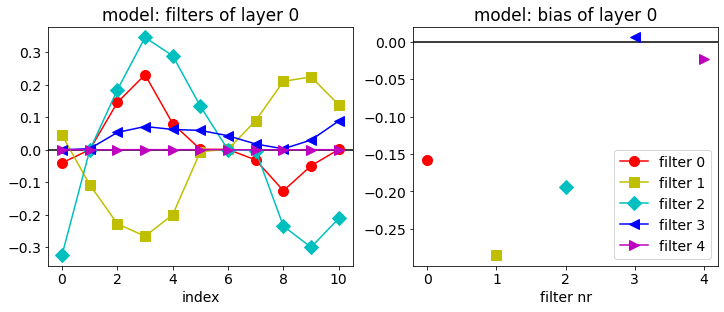

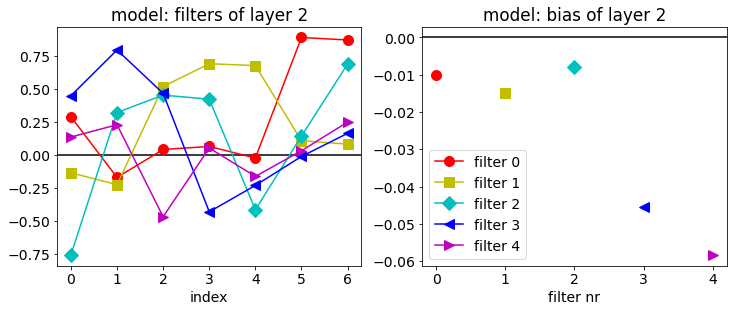

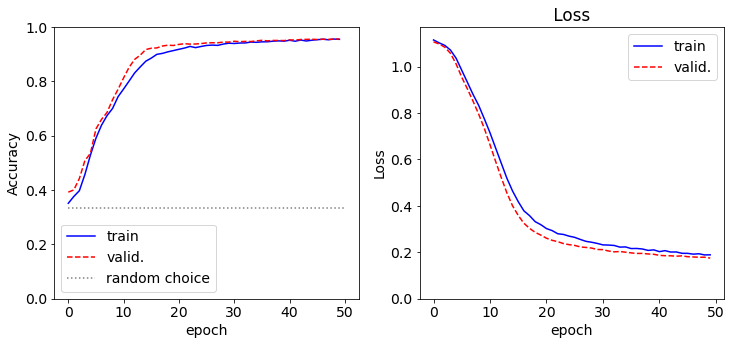

In [11]:
bestmodel = build_model(reg = grid_result.best_params_['reg'], lmb = grid_result.best_params_['lmb'])

fit = bestmodel.fit(x_train,y_train,batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                validation_data=(x_val, y_val),
                verbose=0, shuffle=True)

Show_weights(bestmodel,0)
Show_weights(bestmodel,2)
Show_history(fit)

## Confusioin Matrix

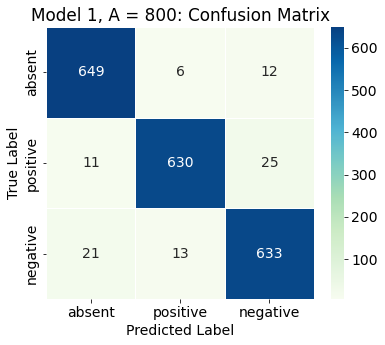

In [15]:

y_pred_val = bestmodel.predict(x_val)
max_y_pred_val = np.argmax(y_pred_val, axis=1)
max_y_val = np.argmax(y_val, axis=1)
show_confusion_matrix(max_y_val, max_y_pred_val, label="Model 1, A = "+str(A))

### Results

The weights don't show any improvement towards our expectations.